## 2. Machine Learning for Regression

In [1]:
import pandas as pd
import numpy as np

## 2.2 Data preparation

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv'

In [3]:
!wget $data

--2025-10-08 16:43:43--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv.5’

data.csv.5          100%[===================>]   1.41M  --.-KB/s    in 0.01s   

2025-10-08 16:43:43 (142 MB/s) - ‘data.csv.5’ saved [1475504/1475504]



In [4]:
df = pd.read_csv(data)

In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [6]:
df['make'].str.lower().str.replace(' ', '_')

0            bmw
1            bmw
2            bmw
3            bmw
4            bmw
          ...   
11909      acura
11910      acura
11911      acura
11912      acura
11913    lincoln
Name: make, Length: 11914, dtype: object

In [7]:
df.dtypes[df.dtypes  == 'object'].index

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')

In [8]:
strings = list(df.dtypes[df.dtypes  == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [9]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [10]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

## 2.3 Exploratory data analysis

for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

In [11]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


## Distribution of price

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

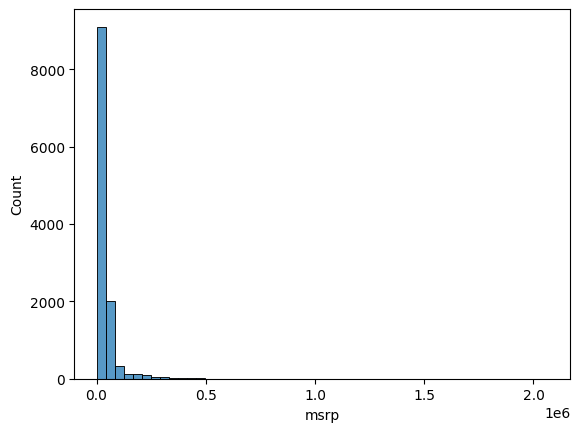

In [13]:
sns.histplot(df.msrp, bins=50)

<Axes: xlabel='msrp', ylabel='Count'>

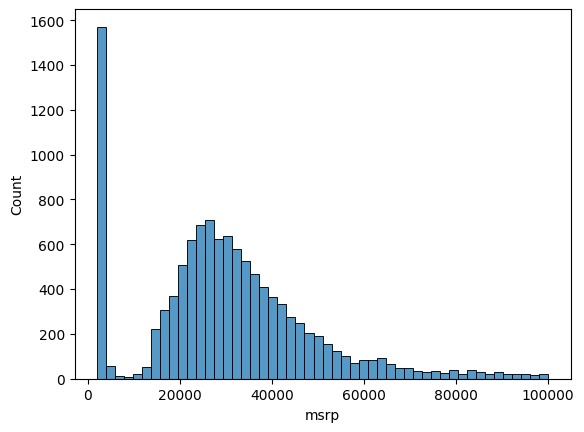

In [14]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

In [15]:
np.log1p([0, 1, 10, 1000, 100000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [16]:
prices_logs = np.log1p(df.msrp)
prices_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<Axes: xlabel='msrp', ylabel='Count'>

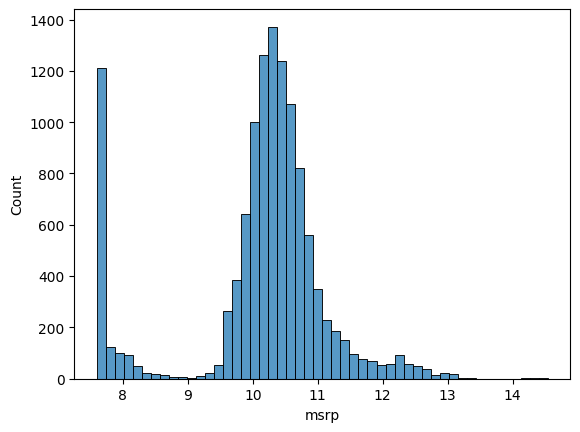

In [17]:
sns.histplot(prices_logs, bins=50)

## Missing values

In [18]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

**2.4 Setting up the validation framework**

 Let's draw it

In [19]:
n = len(df) # Length of the data frame

n_val = int(n * 0.2) # Size of the validation dataset
n_test = int(n * 0.2) # Size of the testing dataset
n_train = n - n_val - n_test # Size of the train dataset

In [20]:
n, n_val + n_test + n_train

(11914, 11914)

In [21]:
n_val, n_test, n_train

(2382, 2382, 7150)

In [22]:
df.iloc[[10, 0, 3, 5]]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
10,bmw,1_series,2013,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,39600
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
5,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,31200


In [23]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [24]:
idx = np.arange(n)

In [25]:
np.random.shuffle(idx)

In [26]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [27]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
7523,nissan,pathfinder,2015,regular_unleaded,260.0,6.0,automatic,front_wheel_drive,4.0,crossover,large,4dr_suv,27,20,2009,33140
11356,nissan,versa,2016,regular_unleaded,109.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,36,27,2009,11990
3601,cadillac,dts,2009,regular_unleaded,275.0,8.0,automatic,front_wheel_drive,4.0,luxury,large,sedan,23,15,1624,47625
7178,dodge,neon,2005,regular_unleaded,132.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,32,25,1851,13800
11228,hyundai,veloster,2014,regular_unleaded,132.0,4.0,automated_manual,front_wheel_drive,3.0,hatchback,compact,2dr_hatchback,36,28,1439,19050


In [28]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [29]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [30]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [31]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [32]:
len(y_train)

7150

## 2.5 Linear regression

draw

In [33]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,nissan,pathfinder,2015,regular_unleaded,260.0,6.0,automatic,front_wheel_drive,4.0,crossover,large,4dr_suv,27,20,2009
1,nissan,versa,2016,regular_unleaded,109.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,36,27,2009
2,cadillac,dts,2009,regular_unleaded,275.0,8.0,automatic,front_wheel_drive,4.0,luxury,large,sedan,23,15,1624
3,dodge,neon,2005,regular_unleaded,132.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,32,25,1851
4,hyundai,veloster,2014,regular_unleaded,132.0,4.0,automated_manual,front_wheel_drive,3.0,hatchback,compact,2dr_hatchback,36,28,1439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,pontiac,solstice,2008,regular_unleaded,173.0,4.0,manual,rear_wheel_drive,2.0,performance,compact,convertible,25,19,210
7146,dodge,ram_cargo,2003,regular_unleaded,175.0,6.0,automatic,rear_wheel_drive,3.0,NaN,midsize,cargo_van,15,13,1851
7147,cadillac,ats,2016,premium_unleaded_(recommended),272.0,4.0,automatic,all_wheel_drive,4.0,"luxury,performance",midsize,sedan,30,22,1624
7148,bmw,x3,2016,premium_unleaded_(required),240.0,4.0,automatic,all_wheel_drive,4.0,"crossover,luxury",midsize,4dr_suv,28,21,3916


In [34]:
df_train.iloc[10]

make                          hyundai
model                  santa_fe_sport
year                             2017
engine_fuel_type     regular_unleaded
engine_hp                       265.0
engine_cylinders                  4.0
transmission_type           automatic
driven_wheels         all_wheel_drive
number_of_doors                   4.0
market_category             crossover
vehicle_size                  midsize
vehicle_style                 4dr_suv
highway_mpg                        24
city_mpg                           19
popularity                       1439
Name: 10, dtype: object

In [35]:
xi = [162, 11, 86]

In [36]:
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [37]:
def linear_regression(xi):
    n = len(xi)

    pred = w0

    for j in range(n):
        pred = pred + w[j] * xi[j]
    
    return pred

In [38]:
linear_regression(xi)

9.402

In [39]:
np.expm1(9.402)

np.float64(12111.581684564773)

In [40]:
np.log1p(12111.581684564773)

np.float64(9.402)

## 2.6 Linear regression vector form

In [41]:
def dot(xi, w):
    n = len(xi)
    res = 0.0

    for j in range(n):
        res = res + xi[j] * w[j]
    return res

In [42]:
def linear_regression(xi):
    return w0 + dot(xi, w)

In [43]:
w_new = [w0] + w

In [44]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [45]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [46]:
linear_regression(xi)

9.402

In [47]:
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

In [48]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

In [49]:
x = [x1, x2, x10]
x

[[1, 148, 24, 1385], [1, 132, 25, 2031], [1, 453, 11, 86]]

In [50]:
x = np.array(x)
x

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [51]:
def linear_regression(x):
    return x.dot(w_new)

In [52]:
linear_regression(x)

array([12.38 , 13.552, 12.312])

## 2.7 Training a linear regression model

In [53]:
x = [ 
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
    
]
x = np.array(x)
x

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [54]:
##ones = np.ones(x.shape[0])
##ones

In [55]:
## x = np.column_stack([ones, x])

In [56]:
y = [100, 200, 150, 250, 100, 200, 150, 250, 120]

In [57]:
XT = np.transpose(x)

In [58]:
XTX = np.dot(XT, x)

In [59]:
XTX_inv = np.linalg.pinv(XTX)

In [60]:
XTy = np.dot(XT, y)

In [61]:
w_full = dot(XTX_inv, XTy)

In [62]:
w0 = w_full[0]
w = w_full[1:]

In [63]:
w0, w

(np.float64(0.2619056150598895), array([3.06101252, 0.03696909]))

In [64]:
def train_linear_regression(x, y):
    ones = np.ones(x.shape[0])
    x = np.column_stack([ones, x])

    XT = np.transpose(x)
    XTX = np.dot(XT,x)
    XTX_inv = np.linalg.pinv(XTX)
    XTy = np.dot(XT, y)
    w_full = dot(XTX_inv, XTy)

    return w_full[0], w_full[1:]

In [65]:
train_linear_regression(x, y)

(np.float64(300.0677669240706), array([-0.22774253, -2.5769413 , -0.02301206]))

## 2.8 Car price baseline model

In [66]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [67]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [68]:
x_train = df_train[base].values

In [69]:
x_train = df_train[base].fillna(0).values

In [70]:
y_train

array([10.40852647,  9.39191165, 10.77113411, ..., 10.7623822 ,
       10.62013151, 10.45322615], shape=(7150,))

In [71]:
w0, w = train_linear_regression(x_train, y_train)

In [72]:
y_pred = w0 + x_train.dot(w)

<Axes: ylabel='Count'>

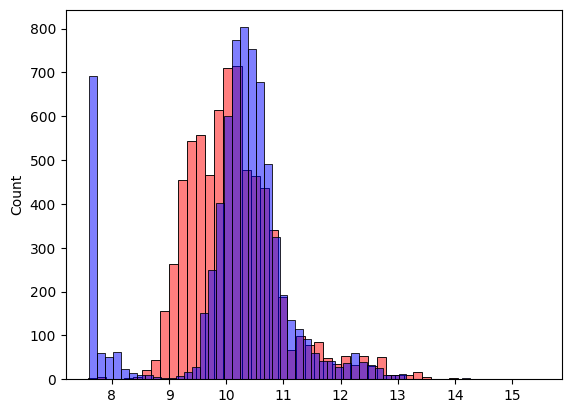

In [73]:
sns.histplot(y_pred, color="red", alpha=0.5, bins=50)
sns.histplot(y_train, color="blue", alpha=0.5, bins=50)

## 2.9 RMSE

In [74]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [75]:
rmse(y_train, y_pred)

np.float64(0.7341701005480106)

## 2.10 Validating the model

In [76]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

x_train = df_train[base].fillna(0).values

w0, w = train_linear_regression(x_train, y_train)

y_pred = w0 + x_train.dot(w)

In [77]:
def prepare_x(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    x = df_num.values
    return x

In [78]:
x_tarin = prepare_x(df_train)
w0, w = train_linear_regression(x_train, y_train)

x_val = prepare_x(df_val)
y_pred = w0 + x_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.8228860524008178)

## 2.11 Simple feature engineering

In [79]:
2017 - df_train.year

0        2
1        1
2        8
3       12
4        3
        ..
7145     9
7146    14
7147     1
7148     1
7149     1
Name: year, Length: 7150, dtype: int64

In [80]:
def prepare_x(df):
    df = df.copy()
    
    df['age'] = 2017 - df.year
    features = base + ['age']
    
    df_num = df[features] 
    df_num = df_num.fillna(0)
    x = df_num.values
    
    return x

In [81]:
x_train = prepare_x(df_train)
w0, w = train_linear_regression(x_train, y_train)

x_val = prepare_x(df_val)
y_pred = w0 + x_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.5359944547483432)

<Axes: ylabel='Count'>

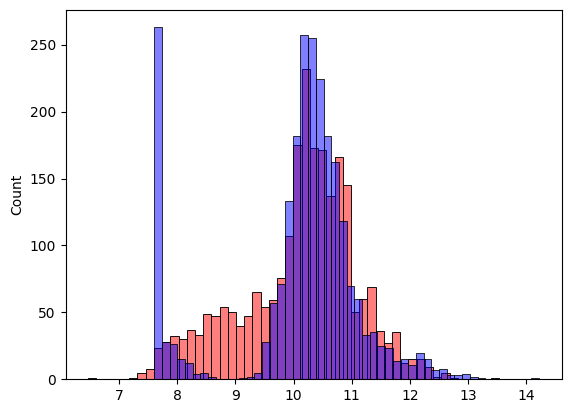

In [82]:
sns.histplot(y_pred, color="red", alpha=0.5, bins=50)
sns.histplot(y_val, color="blue", alpha=0.5, bins=50)

## 2.12 Categorical variables

In [83]:
makes = list(df.make.value_counts().head().index)
makes

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [84]:
def prepare_x(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        df['num_door_%s' % v] = (df.number_of_doors == v).astype('int')  # ✅ Use df, not df_train
        features.append('num_door_%s' % v)
        
    for v in makes:
        df['makes_%s' % v] = (df.number_of_doors == v).astype('int')  # ✅ Use df, not df_train
        features.append('makes_%s' % v)
    
    df_num = df[features] 
    df_num = df_num.fillna(0)
    x = df_num.values
    
    return x

In [85]:
x_train = prepare_x(df_train)
w0, w = train_linear_regression(x_train, y_train)

x_val = prepare_x(df_val)
y_pred = w0 + x_val.dot(w)


rmse(y_val, y_pred)

np.float64(0.537933968065092)

In [86]:
df_train.dtypes == 'object'

make                  True
model                 True
year                 False
engine_fuel_type      True
engine_hp            False
engine_cylinders     False
transmission_type     True
driven_wheels         True
number_of_doors      False
market_category       True
vehicle_size          True
vehicle_style         True
highway_mpg          False
city_mpg             False
popularity           False
dtype: bool

In [87]:
categorical_variables = ['make', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style']

In [88]:
categories = {}

for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index)

In [89]:
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [90]:
def prepare_x(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        df['num_door_%s' % v] = (df.number_of_doors == v).astype('int')  # ✅ Use df, not df_train
        features.append('num_door_%s' % v)

    for c, values in categories.items():
        for v in values:
            df['%s_%s' % (c, v)] = (df[c] == v).astype('int')
            features.append('%s_%s' % (c, v))
        
    df_num = df[features] 
    df_num = df_num.fillna(0)
    x = df_num.values
    
    return x

In [91]:
x_train = prepare_x(df_train)
w0, w = train_linear_regression(x_train, y_train)

x_val = prepare_x(df_val)
y_pred = w0 + x_val.dot(w)


rmse(y_val, y_pred)

np.float64(0.5261780816255394)

## 2.13 Regularization

In [122]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)  # ✅ Change lowercase 'x' to uppercase 'X'
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg
    
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [123]:
x_train = prepare_x(df_train)

In [124]:
x_train = prepare_x(df_train)
w0, w = train_linear_regression_reg(x_train, y_train, r=0.01)

x_val = prepare_x(df_val)
y_pred = w0 + x_val.dot(w)


rmse(y_val, y_pred)

np.float64(0.5258552424681541)

## 2.14 Tuning the model

In [131]:
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    #w0, w = train_linear_regression_reg(x_train, y_train, r=r)
    #print('%5s, %.2f, %.2f, %.2f' % (r, w_0, w[13], w[21]))

    x_train = prepare_x(df_train)
    w0, w = train_linear_regression_reg(x_train, y_train, r=0.01)

    x_val = prepare_x(df_val)
    y_pred = w0 + x_val.dot(w)

    score = rmse(y_val, y_pred)

    print(r, w0, score)

0 6.778045080646557 0.5258552424681541
0.001 6.778045080646557 0.5258552424681541
0.01 6.778045080646557 0.5258552424681541
0.1 6.778045080646557 0.5258552424681541
1 6.778045080646557 0.5258552424681541
10 6.778045080646557 0.5258552424681541


In [135]:
r = 0.001
x_train = prepare_x(df_train)
w0, w = train_linear_regression_reg(x_train, y_train, r=0.01)

x_val = prepare_x(df_val)
y_pred = w0 + x_val.dot(w)

score = rmse(y_val, y_pred)
score

np.float64(0.5258552424681541)

## 2.15 Uding the model

In [146]:
df_full_train = pd.concat([df_train, df_val])

In [147]:
df_full_train = df_full_train.reset_index(drop=True)

In [148]:
X_full_train = prepare_x(df_full_train)

In [149]:
X_full_train

array([[260.,   6.,  27., ...,   0.,   0.,   0.],
       [109.,   4.,  36., ...,   0.,   0.,   0.],
       [275.,   8.,  23., ...,   0.,   0.,   0.],
       ...,
       [120.,   4.,  23., ...,   0.,   0.,   0.],
       [113.,   4.,  26., ...,   0.,   0.,   0.],
       [175.,   4.,  34., ...,   0.,   0.,   0.]], shape=(9532, 41))

In [151]:
y_full_train = np.concatenate([y_train, y_val])

In [152]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [156]:
x_test = prepare_x(df_test)
y_pred = w0 + x_test.dot(w)

score = rmse(y_test, y_pred)
score

np.float64(0.46273570281916365)

In [161]:
car = df_test.iloc[20].to_dict()
car

{'make': 'mazda',
 'model': '626',
 'year': 2000,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 170.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'manual',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'midsize',
 'vehicle_style': 'sedan',
 'highway_mpg': 25,
 'city_mpg': 19,
 'popularity': 586}

In [162]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,mazda,626,2000,regular_unleaded,170.0,6.0,manual,front_wheel_drive,4.0,NaN,midsize,sedan,25,19,586


In [164]:
x_small = prepare_x(df_small) 

In [168]:
y_pred = w0 + x_small.dot(w)
y_pred = y_pred[0]
y_pred

np.float64(8.818657174766162)

In [169]:
np.expm1(y_pred)

np.float64(6758.1821282089695)

In [170]:
y_test[20]

np.float64(7.640603826393634)

In [171]:
np.expm1(y_test[20])

np.float64(2079.999999999999)